In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import lime
import lime.lime_tabular
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [2]:
fao_data = pd.read_csv("datasets/latest0705.csv", index_col='Unnamed: 0')
fao_data



,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,0.0,0.0,0.0,Sunflower seed,-0.8656,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,-81.0,0.0,0.0,31.0,0.41,0.41,0.41
2020-01-01,-106607.0,-55584.0,26854.0,Hop cones,0.2323,-15.0,-241.0,142.0,140.0,-773.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.41,0.41
2020-01-01,0.0,0.0,0.0,Rape or colza seed,1.4064,0.0,0.0,0.0,0.0,0.0,...,0.0,-84.0,0.0,0.0,4.0,0.0,0.0,0.10,0.41,0.41
2020-01-01,0.0,0.0,0.0,Soya beans,-1.0056,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-84.0,0.0,0.0,4.0,0.0,0.10,0.10,0.41


In [3]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

Intercept 10.652829016978728
Prediction_local [10.43155977]
Right: 7.155276200000003


,Features_Fruits and Nuts,Coeffcients (RandomForest)_Fruits and Nuts
0,Summer <= 0.00,-3.083142
1,0.17 < Yield(tonnes/ha)-1 <= 0.28,-2.010780
2,Herbicides – Urea derivates <= 0.51,1.673520
3,Herbicides – Phenoxy hormone products <= 0.52,1.412476
4,Autumn <= 0.00,1.173029
5,Fung & Bact – Other-3 <= 0.50,-1.068125
6,Insecticides – Other <= 0.39,1.010745
7,Fung & Bact – Dithiocarbamates-2 <= 0.51,-0.992893
8,Herbicides – Sulfonyl ureas-1 <= 0.50,0.857747
9,Nutrient nitrogen N (total) - tonnes-1 <= 0.51,0.806153


Intercept 22.224126943005867
Prediction_local [132.64875766]
Right: 234.49257720000023


,Features_Vegetables and Legumes,Coeffcients (RandomForest)_Vegetables and Legumes
0,Summer > 0.00,97.626449
1,Yield(tonnes/ha)-1 > 0.38,6.529039
2,0.04 < Yield(tonnes/ha)-2 <= 0.21,5.958294
3,Insecticides – Pyrethroids-1 <= 0.50,4.594313
4,Herbicides – Phenoxy hormone products-3 <= 0.52,4.071654
5,Insecticides – Organo-phosphates-2 <= 0.51,-3.537370
6,"Fung & Bact – Triazoles, diazoles <= 0.50",3.464572
7,Fall <= 0.00,-2.939004
8,Herbicides – Triazines-3 <= 0.49,-2.749005
9,Spring <= 0.00,-2.594311


Intercept 0.6493371380835316
Prediction_local [0.52378098]
Right: 1.1087206


,Features_Cereals,Coeffcients (RandomForest)_Cereals
0,Summer <= 0.00,-1.985551
1,0.55 < Yield(tonnes/ha)-1 <= 0.65,1.008351
2,Spring <= 0.00,0.273575
3,Herbicides – Amides-1 <= 0.48,-0.262813
4,0.55 < Yield(tonnes/ha)-2 <= 0.65,0.254885
5,0.00 < Autumn <= 1.00,0.215239
6,Herbicides – Bipiridils-2 <= 0.51,0.202617
7,Insecticides – Other-3 <= 0.30,0.176869
8,"Fung & Bact – Triazoles, diazoles-1 <= 0.50",-0.176214
9,Insecticides – Botanical products and biologic...,0.167486


Intercept -0.04674225452938815
Prediction_local [0.10923219]
Right: 0.14825640000000018


,Features_Industrial_crops,Coeffcients (RandomForest)_Industrial_crops
0,Yield(tonnes/ha)-1 <= 0.35,0.605829
1,Spring <= 0.00,-0.233922
2,Year-Round <= 0.00,-0.163124
3,Insecticides – Organo-phosphates-2 <= 0.52,-0.064770
4,"Fung & Bact – Triazoles, diazoles <= 0.50",0.060056
5,Insecticides – Pyrethroids-3 > 0.50,-0.057679
6,Herbicides – Bipiridils <= 0.51,0.053082
7,Herbicides – Carbamates-1 <= 0.51,0.052205
8,Rodenticides – Other-3 > 0.50,-0.051892
9,Herbicides – Urea derivates-1 <= 0.52,-0.043812


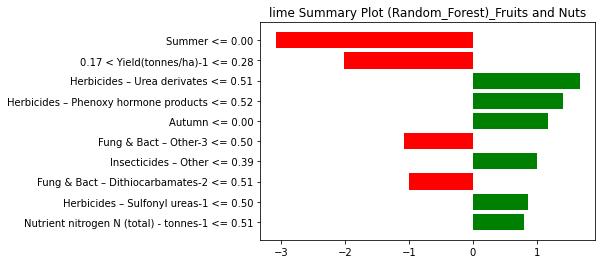

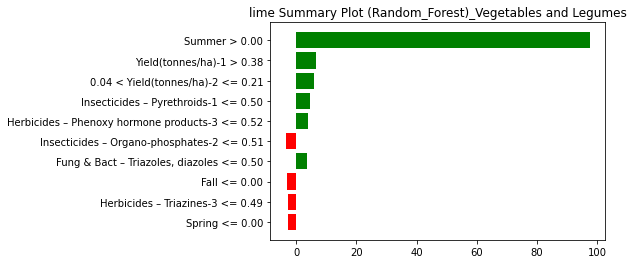

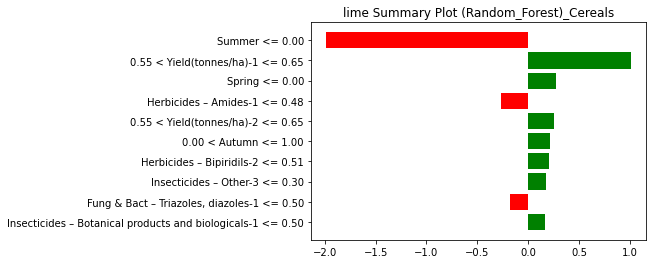

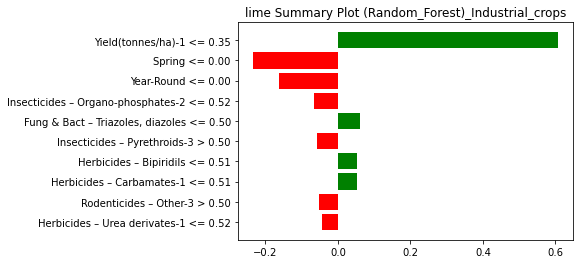

In [4]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')

    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    

    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)

    x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)#, max_depth= 10)
    regressor.fit(x_train, y_train)
    
    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (Random_Forest)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (RandomForest)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (RandomForest)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_random_forest.docx')
   

    
   


In [5]:
fao_data.iloc[-1]

Nutrient nitrogen N (total) - tonnes                   0.0
Nutrient phosphate P2O5 (total) - tonnes               0.0
Nutrient potash K2O (total) - tonnes                   0.0
Item                                        Sunflower seed
Yield(tonnes/ha)                                   -0.6208
                                                 ...      
Herbicides – Sulfonyl ureas-2                          0.0
Herbicides – Sulfonyl ureas-3                          4.0
Rodenticides – Anti-coagulants-1                       0.1
Rodenticides – Anti-coagulants-2                       0.1
Rodenticides – Anti-coagulants-3                       0.1
Name: 2020-01-01, Length: 115, dtype: object